In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

Analisis exploratorio de la Data


In [174]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [176]:
df.shape

(891, 15)

In [177]:
df.sample(5, random_state=42)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
439,0,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
840,0,3,male,20.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
720,1,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False


In [178]:
df.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

<Axes: >

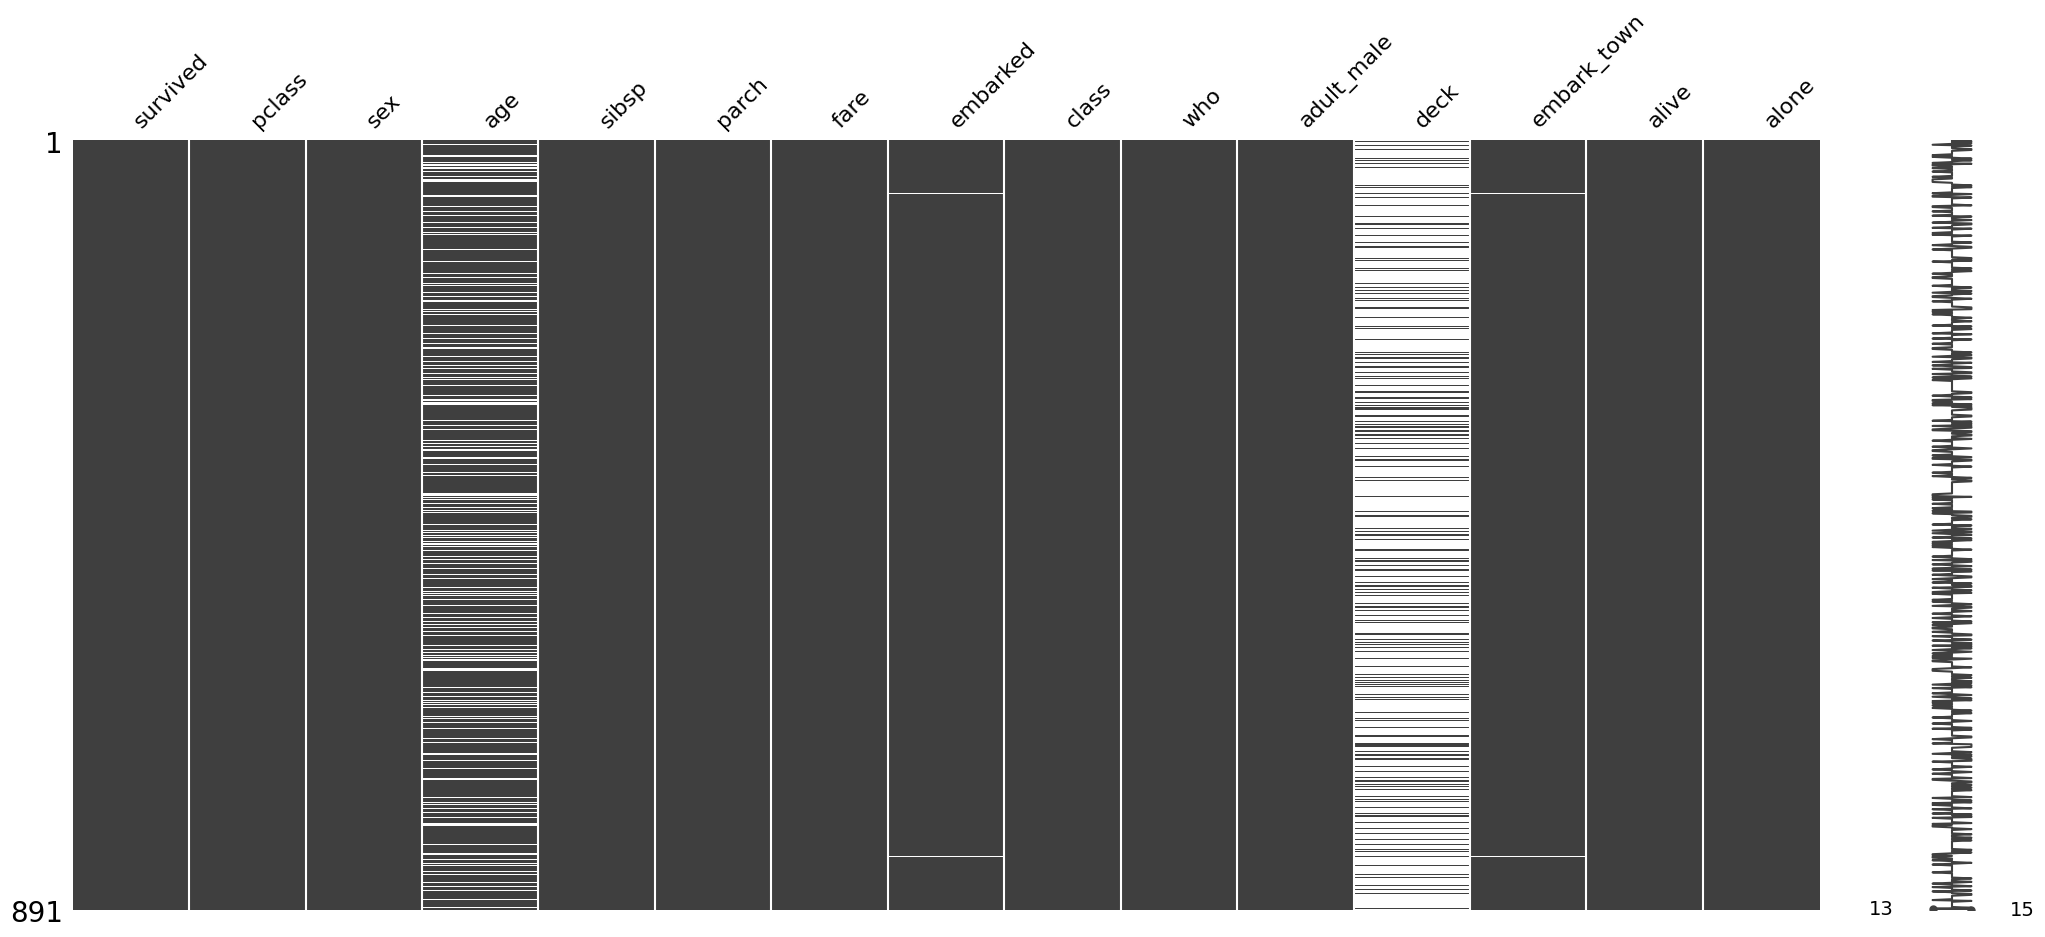

In [179]:
msn.matrix(df)

Estadísticos descriptivos


In [180]:
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Estadisticos descriptivos


In [181]:
print(df['age'].mean())
print(df['age'].median())
print(df['age'].mode()[0])

print(df['age'].std())
print(df['age'].var())

q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
print(q1,q3,iqr)

print(df['age'].min(), df['age'].max())

29.69911764705882
28.0
24.0
14.526497332334042
211.01912474630802
20.125 38.0 17.875
0.42 80.0


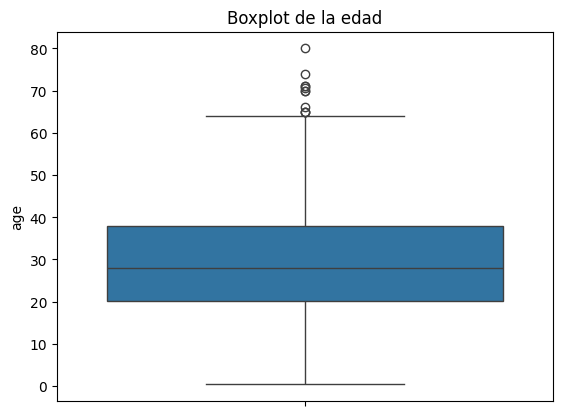

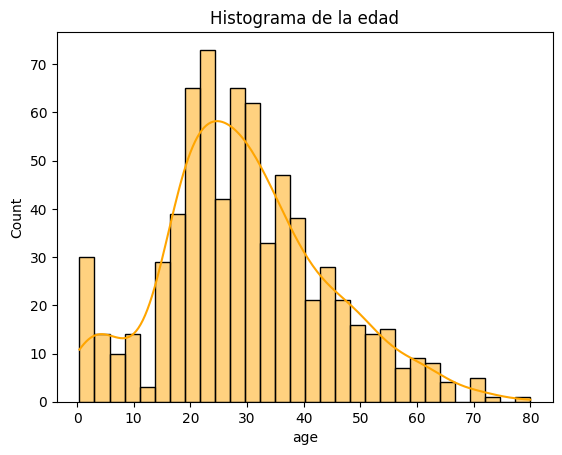

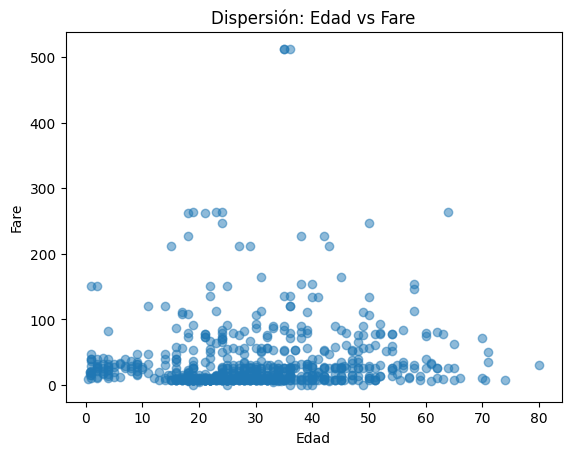

Asimetría (skewness): 0.38910778230082704
Curtosis: 0.17827415364210353


(None, None)

In [182]:
sns.boxplot(y=df['age'])
plt.title("Boxplot de la edad")
plt.show()

sns.histplot(df['age'].dropna(),kde=True, bins=30, color="orange", edgecolor="black")
plt.title("Histograma de la edad")
plt.show()

plt.scatter(df['age'], df['fare'], alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Fare")
plt.title("Dispersión: Edad vs Fare")
plt.show()

print(f"Asimetría (skewness): {df['age'].skew()}"), print(f"Curtosis: {df['age'].kurtosis()}")

LIMPIEZA Y PREPROCESAMIENTO

In [183]:
#DUPLICADOS
duplicados = df.duplicated().sum()
print(duplicados)

#Borrar duplicados
df = df.drop_duplicates()
sinDuplicados = df.duplicated().sum()
print(sinDuplicados)

107
0


In [184]:
df.isna().sum().sort_values(ascending=False)

deck           582
age            106
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

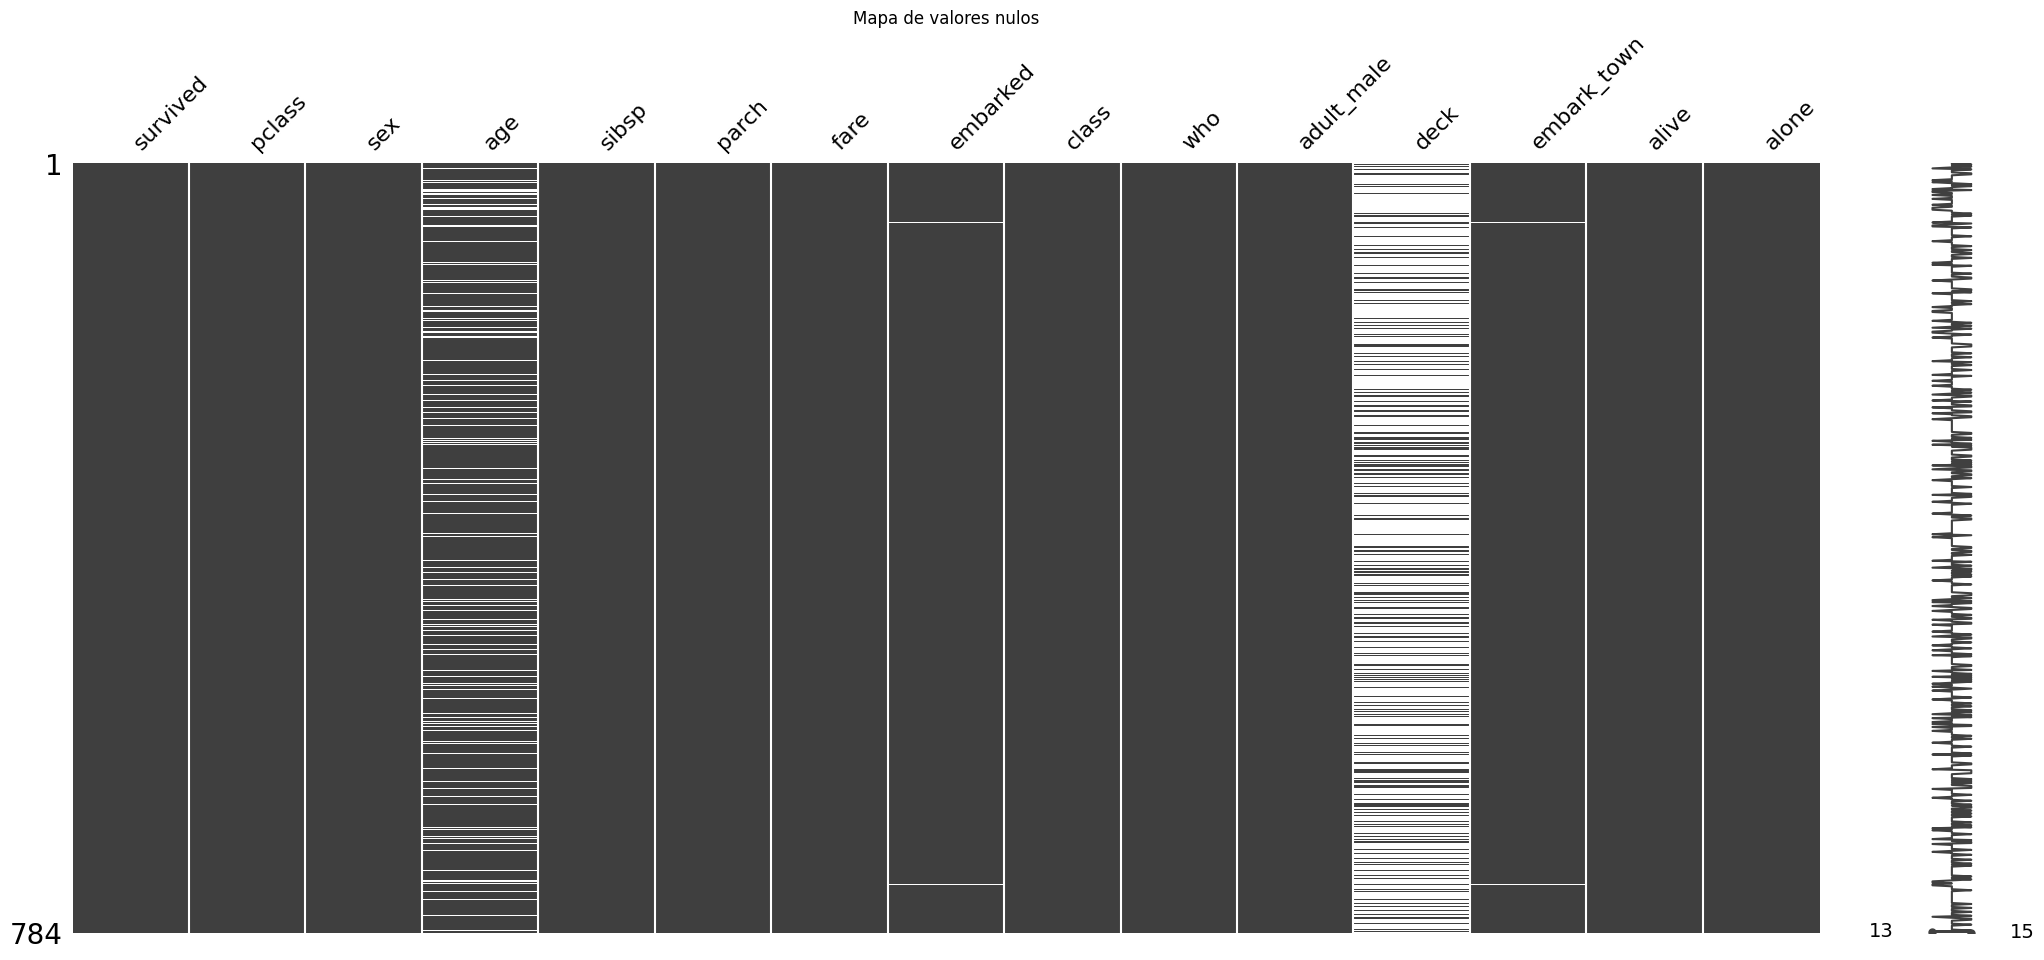

In [185]:
msn.matrix(df)
plt.title("Mapa de valores nulos")
plt.show()

IMPUTAR VALORES NULOS Y ELIMIANR COLUMNAS CON MUCHOS NULOS

In [186]:
df.drop(columns=['deck'], inplace=True)

In [187]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_14244\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [188]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_14244\2478460875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
C:\Users\nicol\AppData\Local\Temp\ipykernel_14244\2478460875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [189]:
df[['age','embarked','embark_town']].isnull().sum()

age            0
embarked       0
embark_town    0
dtype: int64

In [190]:
#Estandarizacion
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

cols_ohe = ['sex', 'embarked', 'who', 'embark_town']

encoded = pd.DataFrame(ohe.fit_transform(df[cols_ohe]), columns=ohe.get_feature_names_out(cols_ohe))

df.drop(columns=cols_ohe).reset_index(drop=True)
df = pd.concat([df, encoded], axis=1)

In [191]:

df['class'] = df['class'].fillna(df['class'].mode()[0])

In [192]:
df['class'].isna().sum()

np.int64(0)

In [193]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['Third', 'Second','First']])
df['class'] = ord_enc.fit_transform(df[['class']])